<a href="https://colab.research.google.com/github/tejonish/IBM-CRT/blob/main/sonar_spectrogram_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SONAR SPECTROGRAM CLASSIFICATION USING CNN AND GAN

Import Block

In [5]:
import numpy as np #for creating sine wave,time signals and noise
import matplotlib.pyplot as plt #plotting spectogram
import os #creating files and saving files
import random #for data shuffling
from scipy.signal import spectrogram #spectrogram() converts sonar to 2d format
from PIL import Image  #loading,resizing,preprossessing the images

import tensorflow

In [9]:
import tensorflow as tf  #DL libs to build and train neural networks
from tensorflow.keras.models import Sequential #linear stack of layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
#Conv2D: the core convolutional layer for extracting patterns from images (like edges in spectrograms).
#MaxPooling2D: downsampling layer — reduces the size while keeping key features.
#Flatten: flattens 2D features into 1D before passing to Dense layer.
#Dense: fully connected layer for decision making (e.g., classify between mine/fish/rock).
#Dropout: randomly turns off neurons during training to avoid overfitting — keeps the model general#
from tensorflow.keras.preprocessing.image import ImageDataGenerator #load resize augument images from folders

functions to generate sonar signals

In [19]:
def generate_sonar_signal(class_type,duration=0.2,fs=5000):
  t=np.linspace(0,duration,int(duration*fs),endpoint=False) # time array

  if class_type=='mine':
    freq=100+20+np.sin(2*np.pi*1*t)  # modulated freq
    signal= np.sin(2*np.pi*freq*t)+0.1*np.random.randn(len(t))  # add noise

  elif class_type=='fish':
    freq=300+50*np.sin(2*np.pi*0.5*t)  # fish freq pattern
    signal=np.sin(2*np.pi*freq*t)+0.2*np.random.randn(len(t)) # more noise

  elif class_type=='rock':
    freq=50  # steady low freq
    signal=0.6*np.sin(2*np.pi*freq*t)+0.05*np.random.randn(len(t))  # slight noise

  return signal,fs


def save_spectrogram(signal,fs,class_type,idx,base_dir='datasets'):
  f,t,sxx=spectrogram(signal,fs)  # convert to spectrogram
  plt.figure(figsize=(2,2)) # fixed image size
  plt.pcolormesh(t,f,sxx,shading='gouraud') # plot spectrogram
  plt.axis('off') # remove axes
  plt.tight_layout(pad=0)  # no padding


  path=os.path.join(base_dir,class_type)  # class folder path
  os.makedirs(path,exist_ok=True)  # create folder if needed

  filename=os.path.join(path,f"{class_type}_{idx:03d}.png")  # image name
  plt.savefig(filename,bbox_inches='tight',pad_inches=0)  # save image
  plt.close() # close plot

now generating images

In [20]:
base_dir='datasets' # main dataset folder
classes=['fish','mine','rock']  # class labels

for cls in classes: # loop through each class
  for i in range(100):  # generate 100 samples per class
    signal,fs=generate_sonar_signal(cls)   # create synthetic sonar signal
    save_spectrogram(signal,fs,cls,i,base_dir)  # convert to spectrogram and save


view sample images from each class

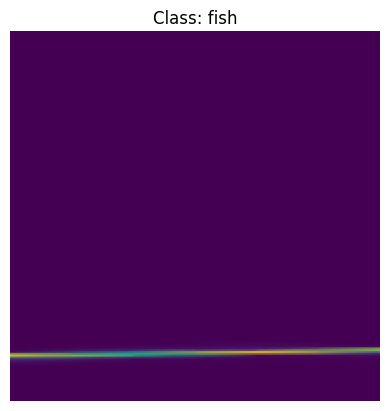

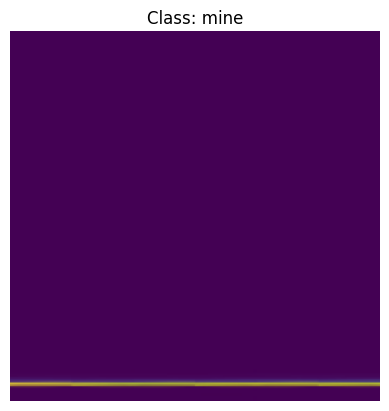

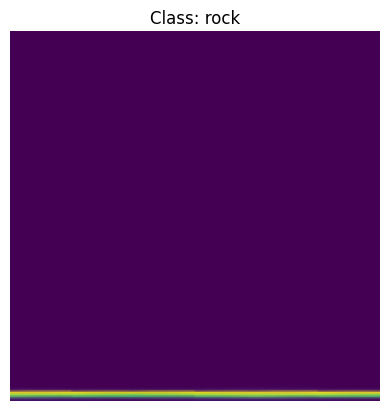

In [25]:
base_dir = 'datasets' # root folder
classes = ['fish', 'mine', 'rock']  # class names

# Show 1 image from each class
for cls in classes:
    # Get the first image file in that class
    image_path = os.path.join(base_dir, cls, os.listdir(os.path.join(base_dir, cls))[0])  # first image path

    # Open and show the image
    img = Image.open(image_path)  # load image
    plt.imshow(img) # display image
    plt.title(f"Class: {cls}")  # show class label
    plt.axis('off') # hide axes
    plt.show()   # show plot

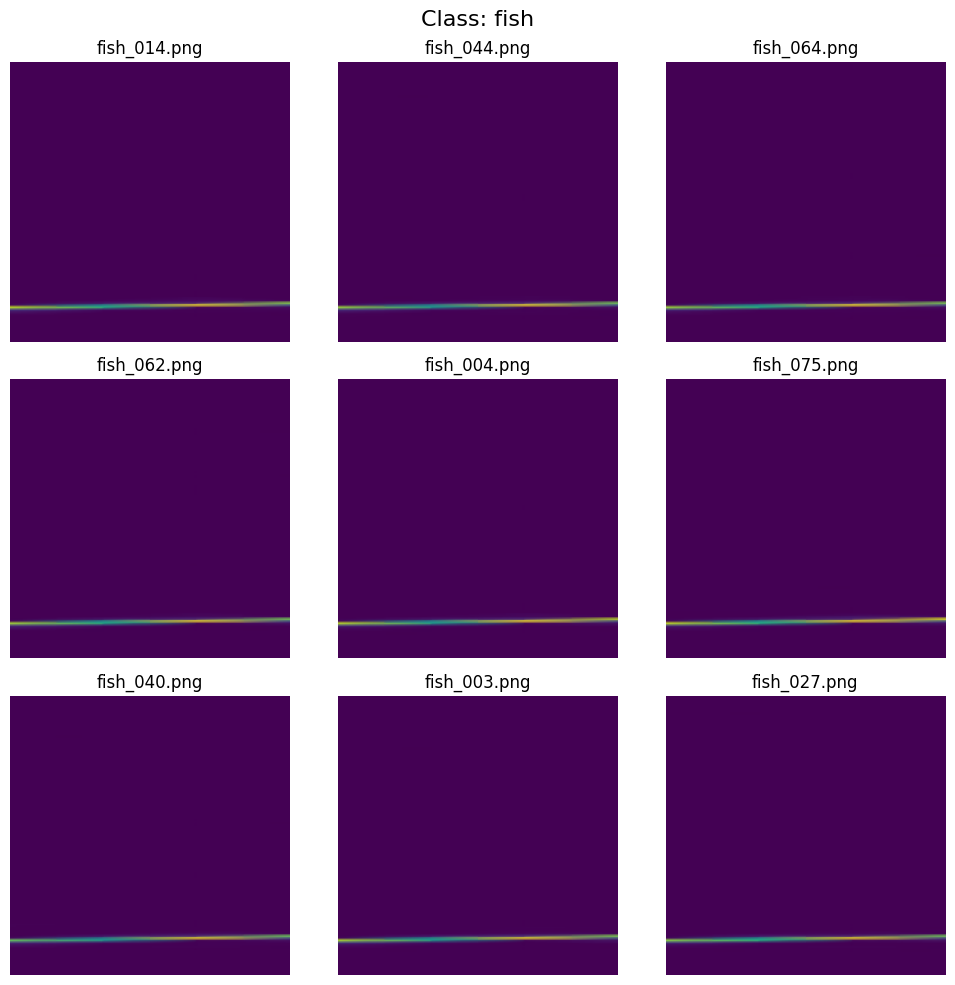

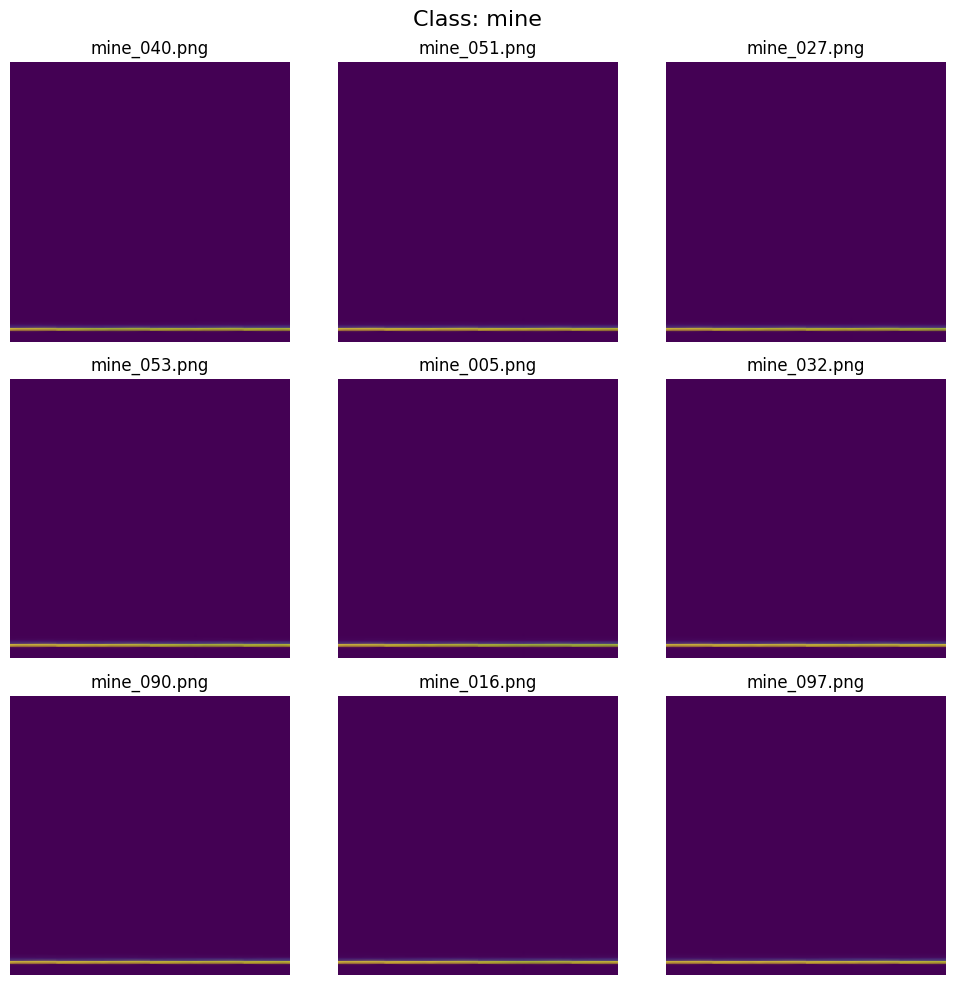

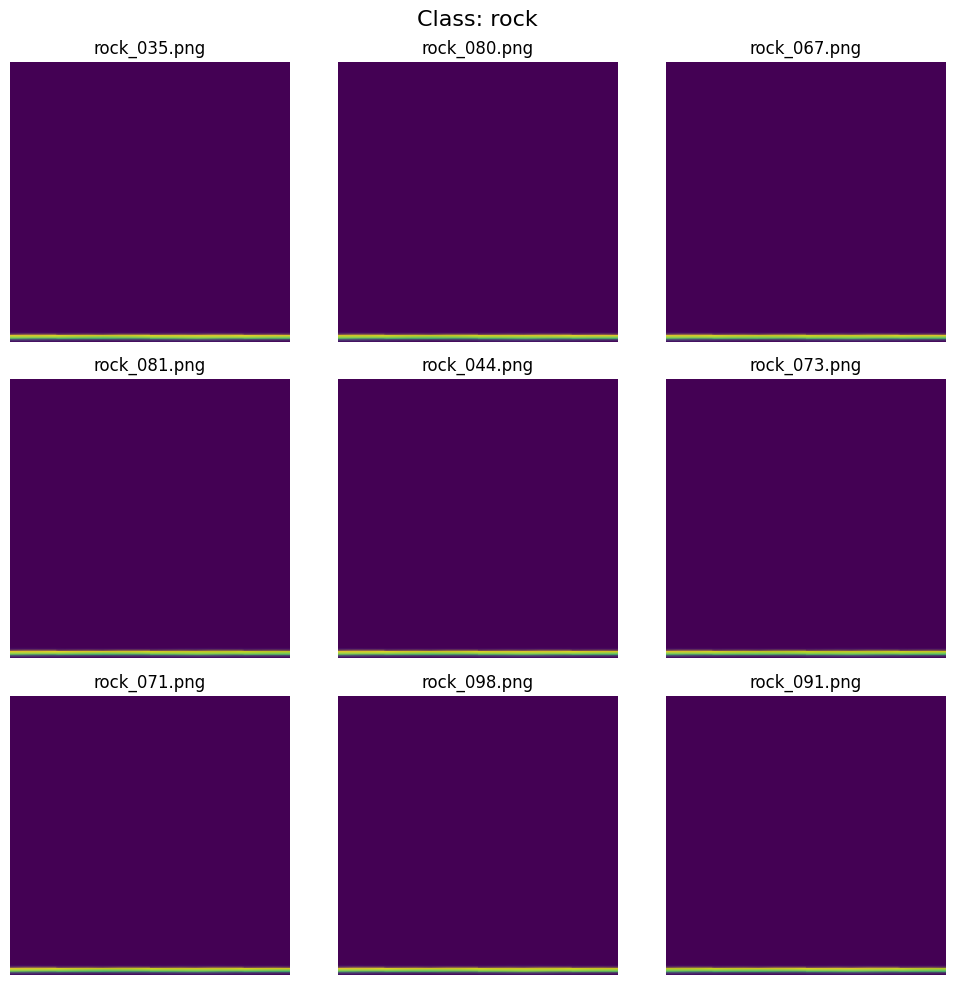

In [23]:
def show_image_grid(class_name, base_dir='datasets', num_images=9):
    #build the path to image dir for given class name
    path = os.path.join(base_dir, class_name)

    #get list of img names in the dir (upto num_images)
    image_files = os.listdir(path)[:num_images]

    #create a new figure for plotting in the gird
    plt.figure(figsize=(10, 10))

    #loop through selected img files
    for i, img_file in enumerate(image_files):
        img_path = os.path.join(path, img_file)  # Full path
        img = Image.open(img_path)   # Open image
        plt.subplot(3, 3, i+1)  # 3x3 grid
        plt.imshow(img) # Show image
        plt.title(f"{img_file}")  # Title = filename
        plt.axis('off') # Hide axes
    plt.suptitle(f"Class: {class_name}", fontsize=16) # Class title
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

# Example usage
show_image_grid('fish')
show_image_grid('mine')
show_image_grid('rock')